In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
###Questions asked:
### 1. Are left side linemen better than right side linemen?
### 2. What attributes are most important for each position?
### 3. What school produces the most players?
### 4. What school produces the most players for each position?
### 5. What attributes have the highest correlations with overall rating?
### 6. Which positions are stronger or faster than others?


In [113]:
m18 = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\Madden18PlayerRatings.csv')
m18['Name'] = m18['First Name'] + ' ' + m18['Last Name']
m18a = m18[['Name', 'College']]
mcclean = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\mcclean1.csv')

In [114]:
mcfd = pd.merge(m18a,mcclean , how='outer', on='Name')

In [115]:
mcfdcols = list(mcfd.columns.values)

In [116]:
print(mcfdcols)

['Name', 'College', 'Unnamed: 0', 'Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Block Shedding', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power', 'Impact Blocking', 'Injury', 'Juke Move', 'Jumping', 'Man Coverage', 'Overall Rating', 'Pass Block', 'Play Action', 'Play Recognition', 'Position', 'Power Moves', 'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Spectacular Catch', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm', 'Strength', 'Tackle', 'Team', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short', 'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking', 'Zone Coverage', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']


In [6]:
## Overall Stats

In [117]:
mcfd.describe()

,Unnamed: 0,Acceleration,Agility,Awareness,Ball Carrier Vision,Block Shedding,Carrying,Catch In Traffic,Catching,Elusiveness,...,Toughness,Trucking,Zone Coverage,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
count,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.00000,...,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000
mean,1951.541143,85.060535,77.447065,67.113732,48.892558,49.147799,57.518344,41.687631,55.505503,44.78957,...,80.126048,41.327306,40.137841,245.146379,32.751722,20.165241,115.481252,32.408930,4.378360,4.753919
std,1129.425975,6.201108,11.532975,13.533131,26.779954,20.726988,15.574879,25.118256,19.202705,24.83473,...,8.272305,19.708972,25.494170,43.671479,3.403994,5.230936,7.929434,46.829888,0.216683,0.268044
min,0.000000,55.000000,43.000000,35.000000,9.000000,6.000000,7.000000,5.000000,10.000000,6.00000,...,40.000000,10.000000,7.000000,156.000000,17.500000,3.000000,84.000000,6.470000,3.810000,4.220000
25%,966.750000,82.000000,69.000000,56.000000,23.000000,32.000000,44.000000,15.000000,39.000000,21.00000,...,75.000000,25.000000,18.000000,204.131148,30.500000,16.000000,111.000000,7.057500,4.207000,4.540000
50%,1951.500000,87.000000,81.000000,67.000000,53.000000,46.000000,60.000000,40.000000,59.000000,44.00000,...,80.000000,39.000000,26.500000,239.109890,33.589286,20.189189,117.941176,7.325000,4.320000,4.714167
75%,2931.250000,90.000000,87.000000,77.000000,74.000000,68.000000,69.000000,65.000000,72.000000,66.00000,...,86.000000,55.000000,69.000000,279.458333,35.255263,24.105263,121.612903,7.900000,4.484259,4.861286
max,3902.000000,98.000000,99.000000,99.000000,98.000000,96.000000,96.000000,98.000000,98.000000,98.00000,...,99.000000,97.000000,94.000000,369.000000,45.000000,44.000000,147.000000,121.612903,5.270000,5.640000


mcfdcombine = mcfd[[['Overall Rating_x','Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', 'Shuttle', '40yd']]

In [8]:
##Which Colleges produce the most NFL players?

In [118]:
mcfdcount = mcfd.groupby('College').count()

In [119]:
print(mcfdcount.head())

              Name  Unnamed: 0  Acceleration  Agility  Awareness  \
College                                                            
Abilene Chr.     2           2             2        2          2   
Air Force        1           1             1        1          1   
Akron            4           4             4        4          4   
Alabama         48          48            48       48         48   
Alabama AM       1           1             1        1          1   

              Ball Carrier Vision  Block Shedding  Carrying  Catch In Traffic  \
College                                                                         
Abilene Chr.                    2               2         2                 2   
Air Force                       1               1         1                 1   
Akron                           4               4         4                 4   
Alabama                        48              48        48                48   
Alabama AM                      1    

In [120]:
sorted_mcfd = mcfdcount.sort_values(by='Name', ascending=False)

In [121]:
top_25 = sorted_mcfd['Name'].head(25)

In [122]:
print(top_25)

College
LSU              55
Florida          51
Alabama          48
Miami            46
Ohio State       46
Florida State    45
Clemson          43
USC              42
Georgia          40
California       40
Auburn           37
Tennessee        35
Oklahoma         35
UCLA             34
Texas AM         33
Notre Dame       33
Penn State       32
Wisconsin        31
Michigan         31
Oregon           30
Stanford         30
Michigan St.     30
Louisville       29
Utah             29
Arkansas         28
Name: Name, dtype: int64


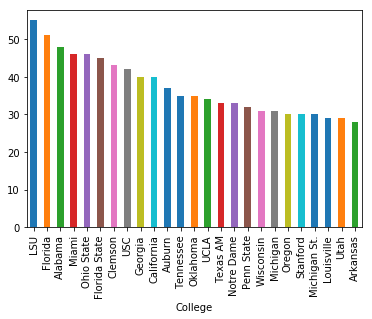

In [123]:
top_25.plot.bar()

In [22]:
top_25.to_csv('C:\\Users\\tilleymusprime\\Desktop\\top25.csv')

In [50]:
##It looks like LSU produces the most college players

In [ ]:
##College Stats

In [47]:
#positiongroup stats

In [ ]:
#Qb stats

In [124]:
qb = mcfd[mcfd['Position'] == 'QB']

In [125]:
qb.shape

(169, 53)

In [126]:
mcfd.shape

(3890, 53)

In [127]:
print(qb.head())

                  Name         College  Unnamed: 0  Acceleration  Agility  \
23         Brian Hoyer    Michigan St.        23.0          76.0     67.0   
29        Matt Barkley             USC        29.0          79.0     64.0   
30       C.J. Beathard            Iowa        30.0          81.0     77.0   
98   Mitchell Trubisky  North Carolina        96.0          87.0     83.0   
108       Mike Glennon      N.C. State       106.0          76.0     54.0   

     Awareness  Ball Carrier Vision  Block Shedding  Carrying  \
23        77.0                 65.0            19.0      60.0   
29        72.0                 63.0            28.0      71.0   
30        63.0                 70.0            28.0      61.0   
98        67.0                 76.0            24.0      63.0   
108       77.0                 42.0            23.0      61.0   

     Catch In Traffic    ...     Toughness  Trucking  Zone Coverage  \
23               15.0    ...          70.0      23.0           19.0   
29  

In [128]:
qbcount = qb.groupby('College').count()

In [129]:
sorted_qbcount = qbcount.sort_values(by='Name', ascending=False)

In [130]:
top10qb = sorted_qbcount.head(10)

In [131]:
print(top10qb['Team'])

College
USC             5
Michigan St.    4
Wisconsin       3
California      3
N.C. State      3
Michigan        3
Tennessee       3
Oregon State    3
LA. Tech        2
Oregon          2
Name: Team, dtype: int64


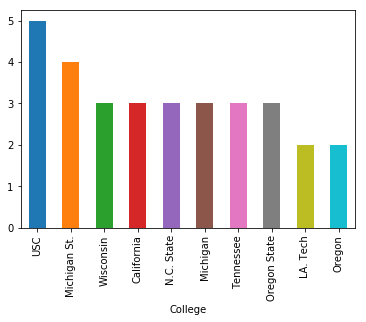

In [132]:
top10qb['Name'].plot.bar()

In [ ]:
### It looks like USC produces the most QB's but are they really better at producing QB's or is it just random chance?

In [134]:
qbmeans = np.mean(qb[['Wt', '3Cone', '40yd', 'Vertical', 'Shuttle', 'Bench', 'Broad Jump']])

In [135]:
print(qbmeans)

Wt            222.866667
3Cone           7.116667
40yd            4.821408
Vertical       31.132812
Shuttle         4.307627
Bench          16.000000
Broad Jump    111.718750
dtype: float64


In [140]:
means = mcfd[['Wt', '3Cone', '40yd', 'Vertical', 'Shuttle', 'Bench', 'Broad Jump']].mean()
print(means)

Wt            245.146379
3Cone          32.408930
40yd            4.753919
Vertical       32.751722
Shuttle         4.378360
Bench          20.165241
Broad Jump    115.481252
dtype: float64


In [ ]:
### QB's have faster than average 3Cone, and shuttle but below average performance in the 40, vertical ability(jumping), 
### bench press and broad jump.  It doesn't appear that the raw physical attributes are the most important for this position

In [105]:
##CornerBack stats

In [145]:
cb = mcfd[mcfd['Position'] == 'CB'] 

In [146]:
cb_college = cb.groupby('College').count()
cb_college_sorted = cb_college.sort_values(by='Unnamed: 0', ascending=False)
cbtop10 = cb_college_sorted.head(10)
print(cbtop10['Unnamed: 0'])

College
LSU              7
Florida State    7
Florida          7
Clemson          6
UCF              5
Ohio State       5
Auburn           5
Miami            5
USC              5
Utah             5
Name: Unnamed: 0, dtype: int64


In [149]:
cbmeans = np.mean(cb[['Wt', '3Cone', '40yd', 'Vertical', 'Shuttle', 'Bench', 'Broad Jump']])

In [150]:
print(cb.head())

                   Name     College  Unnamed: 0  Acceleration  Agility  \
18     Rashard Robinson         LSU        18.0          90.0     86.0   
26      K'Waun Williams  Pittsburgh        26.0          92.0     92.0   
41         Keith Reaser         FAU        41.0          91.0     85.0   
42  Ahkello Witherspoon    Colorado        42.0          92.0     91.0   
45           Will Davis  Utah State        45.0          90.0     93.0   

    Awareness  Ball Carrier Vision  Block Shedding  Carrying  \
18       75.0                 69.0            54.0      55.0   
26       70.0                 65.0            37.0      60.0   
41       65.0                 64.0            36.0      64.0   
42       63.0                 61.0            43.0      59.0   
45       67.0                 81.0            42.0      64.0   

    Catch In Traffic  ...   Toughness  Trucking  Zone Coverage          Wt  \
18              33.0  ...        86.0      27.0           70.0  171.000000   
26            

In [151]:
print([cbmeans, means, (cbmeans - means)])

[Wt            196.454240
3Cone           6.928955
40yd            4.505457
Vertical       35.670732
Shuttle         4.179622
Bench          14.739856
Broad Jump    122.316861
dtype: float64, Wt            245.146379
3Cone          32.408930
40yd            4.753919
Vertical       32.751722
Shuttle         4.378360
Bench          20.165241
Broad Jump    115.481252
dtype: float64, Wt           -48.692139
3Cone        -25.479975
40yd          -0.248462
Vertical       2.919010
Shuttle       -0.198738
Bench         -5.425384
Broad Jump     6.835609
dtype: float64]


In [ ]:
### Cornerbacks perform above average in every category except bench.  

In [89]:
#CB Correlations

In [ ]:
###Speed is the key for CB's

In [ ]:
##LB Stats

In [152]:
mlb = mcfd[mcfd['Position'] == 'MLB']

In [153]:
print(mlb.head())

                Name             College  Unnamed: 0  Acceleration  Agility  \
1     NaVorro Bowman          Penn State         1.0          87.0     83.0   
54       Brock Coyle             Montana        54.0          89.0     80.0   
75   Jerrell Freeman  Mary Hardin-Baylor        75.0          83.0     79.0   
80   Danny Trevathan            Kentucky        80.0          86.0     78.0   
103  Nick Kwiatkoski       West Virginia       101.0          87.0     87.0   

     Awareness  Ball Carrier Vision  Block Shedding  Carrying  \
1         90.0                 27.0            82.0      50.0   
54        69.0                 32.0            73.0      60.0   
75        90.0                 35.0            85.0      45.0   
80        86.0                 28.0            82.0      45.0   
103       72.0                 37.0            82.0      42.0   

     Catch In Traffic    ...     Toughness  Trucking  Zone Coverage  \
1                40.0    ...          75.0      10.0           

In [156]:
mlbmeans = np.mean(mlb[['Wt', 'Overall Rating', 'Wt', 'Shuttle', 'Vertical',
                  '3Cone', '40yd', 'Bench', 'Broad Jump']])

In [407]:
print(mlbmeans, means, (mlbmeans - means))

Wt                  237.293333
Overall Rating_x     71.432836
Wt                  237.293333
Shuttle               4.271020
Vertical             33.742424
3Cone                 7.094255
40yd                  4.685441
Bench                21.951613
Broad Jump          118.242424
dtype: float64 Wt            243.376448
3Cone           7.248442
40yd            4.782479
Vertical       32.600599
Shuttle         4.397884
Bench          20.365121
Broad Jump    115.219394
dtype: float64 3Cone              -0.154187
40yd               -0.097038
Bench               1.586492
Broad Jump          3.023030
Overall Rating_x         NaN
Shuttle            -0.126863
Vertical            1.141825
Wt                 -6.083115
Wt                 -6.083115
dtype: float64


In [ ]:
### Above average strength above average speed

In [157]:
mlb_combine = mlb[['Overall Rating', 'Wt', 'Shuttle', 'Vertical',
                  '3Cone', '40yd', 'Bench', 'Broad Jump']]

In [158]:
mlb_combine.corr()

,Overall Rating,Wt,Shuttle,Vertical,3Cone,40yd,Bench,Broad Jump
Overall Rating,1.000000,-0.014131,-0.145679,0.168450,-0.051120,-0.241018,0.047503,0.133509
Wt,-0.014131,1.000000,0.056428,-0.020343,0.086876,0.348978,0.228166,-0.180858
Shuttle,-0.145679,0.056428,1.000000,-0.102816,0.471297,0.215656,-0.141916,-0.137094
Vertical,0.168450,-0.020343,-0.102816,1.000000,-0.034810,-0.388893,0.076162,0.635457
3Cone,-0.051120,0.086876,0.471297,-0.034810,1.000000,0.230841,-0.023518,-0.136390
40yd,-0.241018,0.348978,0.215656,-0.388893,0.230841,1.000000,-0.068680,-0.493705
Bench,0.047503,0.228166,-0.141916,0.076162,-0.023518,-0.068680,1.000000,0.018780
Broad Jump,0.133509,-0.180858,-0.137094,0.635457,-0.136390,-0.493705,0.018780,1.000000


In [103]:
## best mlb by college

In [160]:
mlb_elite = mlb[mlb['Overall Rating'] >= 80]

In [161]:
print(mlb_elite.head())

                 Name             College  Unnamed: 0  Acceleration  Agility  \
1      NaVorro Bowman          Penn State         1.0          87.0     83.0   
75    Jerrell Freeman  Mary Hardin-Baylor        75.0          83.0     79.0   
80    Danny Trevathan            Kentucky        80.0          86.0     78.0   
162       Vincent Rey                Duke       160.0          87.0     78.0   
306  Brandon Marshall              Nevada       304.0          87.0     81.0   

     Awareness  Ball Carrier Vision  Block Shedding  Carrying  \
1         90.0                 27.0            82.0      50.0   
75        90.0                 35.0            85.0      45.0   
80        86.0                 28.0            82.0      45.0   
162       81.0                 22.0            80.0      62.0   
306       88.0                 41.0            83.0      55.0   

     Catch In Traffic    ...     Toughness  Trucking  Zone Coverage  \
1                40.0    ...          75.0      10.0     

In [162]:
mlb_elite.shape

(33, 53)

In [165]:
mlb_elite.groupby('College').count()

,Name,Unnamed: 0,Acceleration,Agility,Awareness,Ball Carrier Vision,Block Shedding,Carrying,Catch In Traffic,Catching,...,Toughness,Trucking,Zone Coverage,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
College,,,,,,,,,,,,,,,,,,,,,
Alabama,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Boston College,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Duke,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Florida State,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Iowa,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Kentucky,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
LSU,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Mary Hardin-Baylor,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Michigan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
#MLB school

In [166]:
mlbcols = list(mlb.columns.values)

In [167]:
print(mlbcols)

['Name', 'College', 'Unnamed: 0', 'Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Block Shedding', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power', 'Impact Blocking', 'Injury', 'Juke Move', 'Jumping', 'Man Coverage', 'Overall Rating', 'Pass Block', 'Play Action', 'Play Recognition', 'Position', 'Power Moves', 'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Spectacular Catch', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm', 'Strength', 'Tackle', 'Team', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short', 'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking', 'Zone Coverage', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']


In [168]:
mlb_college = mlb.groupby('College').count()

In [169]:
print(mlb_college)

                  Name  Unnamed: 0  Acceleration  Agility  Awareness  \
College                                                                
Akron                1           1             1        1          1   
Alabama              4           4             4        4          4   
Arizona              1           1             1        1          1   
Arkansas             2           2             2        2          2   
Arkansas St.         1           1             1        1          1   
Auburn               2           2             2        2          2   
BYU                  2           2             2        2          2   
Baylor               1           1             1        1          1   
Boise State          1           1             1        1          1   
Boston College       4           4             4        4          4   
Cal Poly SLO         1           1             1        1          1   
Central Michigan     1           1             1        1       

In [170]:
mlb_college_sorted = mlb_college.sort_values(by='Unnamed: 0', ascending=False)

In [171]:
mlb_top10 = mlb_college_sorted.head(10)

In [172]:
print(mlb_top10['Unnamed: 0'])

College
LSU               6
Penn State        4
Boston College    4
Alabama           4
Louisville        3
Michigan          3
Florida State     3
Florida           3
Kentucky          3
Ohio State        3
Name: Unnamed: 0, dtype: int64


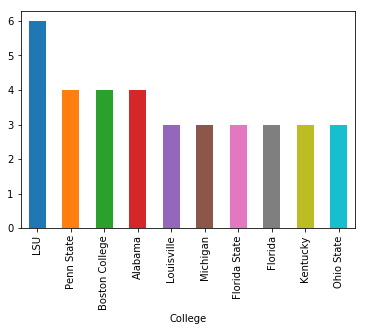

In [173]:
mlb_top10['Unnamed: 0'].plot.bar()

In [129]:
##Linemen

In [ ]:
##Centers

In [175]:
c = mcfd[mcfd['Position'] == 'C']

In [176]:
ccount = c.groupby('College').count()

In [177]:
print(ccount)

                  Name  Unnamed: 0  Acceleration  Agility  Awareness  \
College                                                                
Air Force            1           1             1        1          1   
Alabama              1           1             1        1          1   
Appalach. St.        1           1             1        1          1   
Arkansas             2           2             2        2          2   
Boise State          1           1             1        1          1   
CSU-Pueblo           1           1             1        1          1   
California           3           3             3        3          3   
Cincinnati           1           1             1        1          1   
Colorado St.         1           1             1        1          1   
Cornell              1           1             1        1          1   
Delaware             1           1             1        1          1   
Florida              3           3             3        3       

In [178]:
csort = ccount.sort_values(by='Unnamed: 0', ascending=False)

In [179]:
Ctop10 = csort.head(10)

In [180]:
print(Ctop10['Unnamed: 0'])

College
USC               3
California        3
Missouri          3
Florida           3
Georgia           2
South Carolina    2
Oregon            2
Ohio State        2
Tennessee         2
Miami             2
Name: Unnamed: 0, dtype: int64


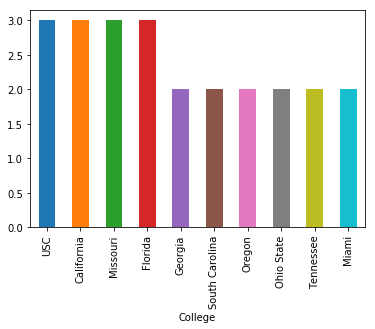

In [181]:
Ctop10['Unnamed: 0'].plot.bar()

In [ ]:
###Baylor produces the most centers but do they produce a statistically significant amount more?

In [183]:
c_combine = c[['Overall Rating', 'Shuttle', 'Vertical', '3Cone', '40yd',
              'Wt', 'Bench', 'Broad Jump']]

In [184]:
cmean = np.mean(c_combine)

In [185]:
print(cmean, means, (cmean- means))

Overall Rating     70.924242
Shuttle             4.648529
Vertical           27.347222
3Cone               7.738788
40yd                5.233830
Wt                307.375000
Bench              26.357143
Broad Jump        102.400000
dtype: float64 Wt            245.146379
3Cone          32.408930
40yd            4.753919
Vertical       32.751722
Shuttle         4.378360
Bench          20.165241
Broad Jump    115.481252
dtype: float64 3Cone            -24.670142
40yd               0.479911
Bench              6.191902
Broad Jump       -13.081252
Overall Rating          NaN
Shuttle            0.270169
Vertical          -5.404500
Wt                62.228621
dtype: float64


In [186]:
c_combine.corr()

,Overall Rating,Shuttle,Vertical,3Cone,40yd,Wt,Bench,Broad Jump
Overall Rating,1.000000,0.028220,0.077537,0.006653,-0.063129,0.004851,0.030990,0.114503
Shuttle,0.028220,1.000000,-0.131217,0.546306,0.109699,0.231798,0.092648,-0.190575
Vertical,0.077537,-0.131217,1.000000,-0.224431,-0.149200,0.001415,0.214336,0.411170
3Cone,0.006653,0.546306,-0.224431,1.000000,0.170684,0.251497,0.223517,-0.145888
40yd,-0.063129,0.109699,-0.149200,0.170684,1.000000,0.224365,-0.101293,-0.558538
Wt,0.004851,0.231798,0.001415,0.251497,0.224365,1.000000,-0.057873,-0.221715
Bench,0.030990,0.092648,0.214336,0.223517,-0.101293,-0.057873,1.000000,0.157731
Broad Jump,0.114503,-0.190575,0.411170,-0.145888,-0.558538,-0.221715,0.157731,1.000000


In [169]:
#Left Tackle

In [188]:
lt = mcfd[mcfd['Position'] == 'LT']

In [189]:
ltcount = lt.groupby('College').count()

In [190]:
print(ltcount)

                    Name  Unnamed: 0  Acceleration  Agility  Awareness  \
College                                                                  
Alabama                2           2             2        2          2   
Appalach. St.          1           1             1        1          1   
Arkansas               2           2             2        2          2   
Arkansas P.B.          1           1             1        1          1   
Army                   1           1             1        1          1   
Auburn                 2           2             2        2          2   
Bloomsburg             1           1             1        1          1   
Boise State            1           1             1        1          1   
Boston College         2           2             2        2          2   
Central Michigan       2           2             2        2          2   
Cincinnati             2           2             2        2          2   
Colorado               3           3  

In [191]:
ltsort = ltcount.sort_values('Unnamed: 0', ascending=False)

In [192]:
lttop10 = ltsort.head(10)

In [193]:
print(lttop10['Unnamed: 0'])

College
USC              3
Colorado         3
Ole Miss         3
Oklahoma         2
Ohio State       2
Pittsburgh       2
Texas AM         2
LSU              2
Florida          2
Eastern Wash.    2
Name: Unnamed: 0, dtype: int64


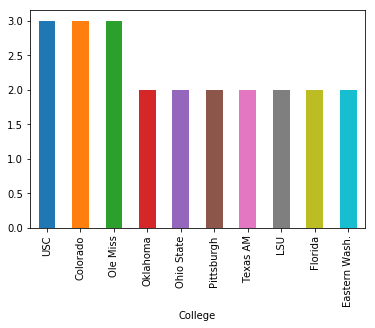

In [194]:
lttop10['Unnamed: 0'].plot.bar()

In [198]:
ltmeans = np.mean(lt[['Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']])

In [199]:
print(ltmeans, means, (ltmeans - means), (ltmeans - cmean))

Wt            314.041667
Vertical       28.262500
Bench          25.731707
Broad Jump    105.027027
3Cone           7.818718
Shuttle         4.753500
dtype: float64 Wt            245.146379
3Cone          32.408930
40yd            4.753919
Vertical       32.751722
Shuttle         4.378360
Bench          20.165241
Broad Jump    115.481252
dtype: float64 3Cone        -24.590212
40yd                NaN
Bench          5.566467
Broad Jump   -10.454225
Shuttle        0.375140
Vertical      -4.489222
Wt            68.895288
dtype: float64 3Cone             0.079930
40yd                   NaN
Bench            -0.625436
Broad Jump        2.627027
Overall Rating         NaN
Shuttle           0.104971
Vertical          0.915278
Wt                6.666667
dtype: float64


In [201]:
ltcorr = lt[['Overall Rating','Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']].corr()

In [410]:
ltcorr

,Overall Rating_x,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle
Overall Rating_x,1.000000,-0.170740,0.068166,0.171809,0.061955,-0.430611,-0.288036
Wt,-0.170740,1.000000,-0.535688,0.168383,-0.416034,0.547605,0.520038
Vertical,0.068166,-0.535688,1.000000,0.122125,0.725586,-0.499450,-0.501802
Bench,0.171809,0.168383,0.122125,1.000000,0.349046,-0.015486,-0.071265
Broad Jump,0.061955,-0.416034,0.725586,0.349046,1.000000,-0.585330,-0.643456
3Cone,-0.430611,0.547605,-0.499450,-0.015486,-0.585330,1.000000,0.806800
Shuttle,-0.288036,0.520038,-0.501802,-0.071265,-0.643456,0.806800,1.000000


In [ ]:
###3Cone seems to be very important as well as the shuttle.  I expected Bench to be more strongly correlated

In [ ]:
#Left Guard

In [202]:
lg = mcfd[mcfd['Position'] == 'LG']

In [203]:
lgcount = lg.groupby('College').count()

In [204]:
lgsort = lgcount.sort_values('Unnamed: 0', ascending = False)

In [205]:
lgtop10 = lgsort.head(10)

In [206]:
print(lgtop10['Unnamed: 0'])

College
Alabama          4
West Virginia    3
Nebraska         3
Ohio State       3
Oregon State     3
Stanford         2
Arizona St.      2
Michigan         2
Purdue           2
N.C. State       2
Name: Unnamed: 0, dtype: int64


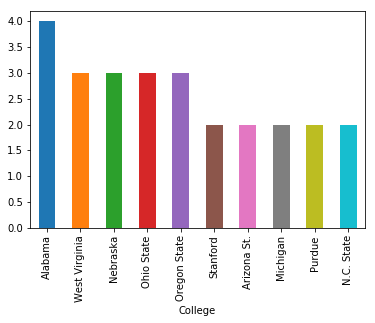

In [207]:
lgtop10['Unnamed: 0'].plot.bar()

In [208]:
lgmeans = np.mean(lg[['Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']])

In [209]:
print(lgmeans, (lgmeans-cmean), lgmeans - ltmeans)

Wt            312.436364
Vertical       27.702128
Bench          26.707317
Broad Jump    103.145833
3Cone           7.792826
Shuttle         4.710213
40yd            5.225091
dtype: float64 3Cone             0.054038
40yd             -0.008739
Bench             0.350174
Broad Jump        0.745833
Overall Rating         NaN
Shuttle           0.061683
Vertical          0.354905
Wt                5.061364
dtype: float64 3Cone        -0.025892
40yd               NaN
Bench         0.975610
Broad Jump   -1.881194
Shuttle      -0.043287
Vertical     -0.560372
Wt           -1.605303
dtype: float64


In [ ]:
###Looks like they have stronger upper bodies and weaker lower bodies than left tackles

In [211]:
lgcorr = lg[['Overall Rating', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [212]:
lgcorr

,Overall Rating,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Overall Rating,1.000000,0.045560,0.047482,0.131425,0.210247,-0.146582,-0.084781,-0.166067
Wt,0.045560,1.000000,-0.233177,0.207237,-0.376003,0.212102,0.366052,0.402181
Vertical,0.047482,-0.233177,1.000000,0.108846,0.479814,-0.008347,-0.154012,-0.228701
Bench,0.131425,0.207237,0.108846,1.000000,0.061137,-0.008295,0.092939,-0.041415
Broad Jump,0.210247,-0.376003,0.479814,0.061137,1.000000,-0.387573,-0.407750,-0.487800
3Cone,-0.146582,0.212102,-0.008347,-0.008295,-0.387573,1.000000,0.672748,0.382539
Shuttle,-0.084781,0.366052,-0.154012,0.092939,-0.407750,0.672748,1.000000,0.409724
40yd,-0.166067,0.402181,-0.228701,-0.041415,-0.487800,0.382539,0.409724,1.000000


In [ ]:
###Strength seems more important than speed for the left guard position.  Will the same be true for right guards?

In [262]:
#Right Guard

In [214]:
rg = mcfd[mcfd['Position'] == 'RG']

In [215]:
rgcount = rg.groupby('College').count()

In [216]:
rgsort = rgcount.sort_values('Unnamed: 0', ascending=False)

In [217]:
rgtop10 = rgsort.head(10)

In [218]:
print(rgtop10['Unnamed: 0'])

College
Iowa            4
Texas AM        3
UCF             2
Alabama         2
San Jose St.    2
Stanford        2
LSU             2
Tennessee       2
Kent State      2
Wisconsin       2
Name: Unnamed: 0, dtype: int64


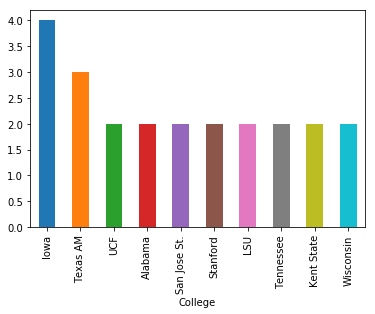

In [219]:
rgtop10['Unnamed: 0'].plot.bar()

In [220]:
rgmean = np.mean(rg[['Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']])

In [221]:
print(rgmean - lgmeans, rgmean-ltmeans, rgmean - cmean, rgmean- means, rgmean - lgmeans)

Wt           -0.862593
Vertical     -0.557897
Bench        -1.413199
Broad Jump   -1.655637
3Cone         0.016970
Shuttle       0.049787
40yd          0.016548
dtype: float64 3Cone        -0.008922
40yd               NaN
Bench        -0.437590
Broad Jump   -3.536831
Shuttle       0.006500
Vertical     -1.118269
Wt           -2.467896
dtype: float64 3Cone             0.071008
40yd              0.007810
Bench            -1.063025
Broad Jump       -0.909804
Overall Rating         NaN
Shuttle           0.111471
Vertical         -0.202991
Wt                4.198770
dtype: float64 3Cone        -24.599134
40yd           0.487720
Bench          5.128877
Broad Jump   -13.991056
Shuttle        0.381640
Vertical      -5.607491
Wt            66.427391
dtype: float64 Wt           -0.862593
Vertical     -0.557897
Bench        -1.413199
Broad Jump   -1.655637
3Cone         0.016970
Shuttle       0.049787
40yd          0.016548
dtype: float64


In [ ]:
###Right guards appear to be less athletic than left guards.  Why is this?  Will the same be true about Right tackles?

In [222]:
rgcorr = rg[['Overall Rating', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [223]:
rgcorr

,Overall Rating,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Overall Rating,1.000000,-0.025783,0.202590,0.121072,0.145939,-0.203361,-0.218459,-0.119425
Wt,-0.025783,1.000000,-0.448730,-0.020725,-0.414025,0.511946,0.560218,0.575938
Vertical,0.202590,-0.448730,1.000000,-0.010259,0.740761,-0.458277,-0.568945,-0.579407
Bench,0.121072,-0.020725,-0.010259,1.000000,0.048218,-0.218107,0.007747,-0.041116
Broad Jump,0.145939,-0.414025,0.740761,0.048218,1.000000,-0.371209,-0.474799,-0.590905
3Cone,-0.203361,0.511946,-0.458277,-0.218107,-0.371209,1.000000,0.763349,0.463528
Shuttle,-0.218459,0.560218,-0.568945,0.007747,-0.474799,0.763349,1.000000,0.496007
40yd,-0.119425,0.575938,-0.579407,-0.041116,-0.590905,0.463528,0.496007,1.000000


In [ ]:
### Strength is less important than speed here

In [280]:
#Right Tackle

In [225]:
rt = mcfd[mcfd['Position'] == 'RT']

In [226]:
rtcount = rt.groupby('College').count()

In [227]:
rtsort = rtcount.sort_values('Unnamed: 0', ascending=False)

In [228]:
rttop10 = rtsort.head(10)

In [229]:
print(rttop10['Unnamed: 0'])

College
TCU               4
Wisconsin         3
Boston College    3
Nebraska          3
Florida State     3
Florida           3
LSU               3
Virginia          2
Ole Miss          2
California        2
Name: Unnamed: 0, dtype: int64


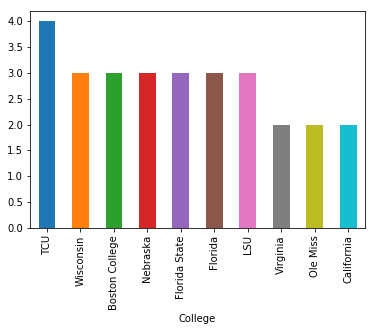

In [230]:
rttop10['Unnamed: 0'].plot.bar()

In [233]:
rtmeans = np.mean(rt[['Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']])

In [234]:
print(rtmeans, rtmeans - ltmeans, rtmeans - rgmean)

Wt            312.471698
Vertical       27.650000
Bench          22.846154
Broad Jump    102.868421
3Cone           7.804167
Shuttle         4.777692
40yd            5.237647
dtype: float64 3Cone        -0.014551
40yd               NaN
Bench        -2.885553
Broad Jump   -2.158606
Shuttle       0.024192
Vertical     -0.612500
Wt           -1.569969
dtype: float64 Wt            0.897928
Vertical      0.505769
Bench        -2.447964
Broad Jump    1.378225
3Cone        -0.005629
Shuttle       0.017692
40yd         -0.003992
dtype: float64


In [ ]:
###Right tackles appear to be less athletic than left tackles.  

In [236]:
rtcorr = rt[['Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [237]:
rtcorr

,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Wt,1.000000,-0.173373,-0.055386,-0.263188,0.305265,0.327882,0.509302
Vertical,-0.173373,1.000000,0.184573,0.456859,-0.569765,-0.651482,-0.378660
Bench,-0.055386,0.184573,1.000000,0.122517,-0.354886,-0.216730,-0.512992
Broad Jump,-0.263188,0.456859,0.122517,1.000000,-0.407595,-0.484671,-0.408592
3Cone,0.305265,-0.569765,-0.354886,-0.407595,1.000000,0.686035,0.440563
Shuttle,0.327882,-0.651482,-0.216730,-0.484671,0.686035,1.000000,0.550811
40yd,0.509302,-0.378660,-0.512992,-0.408592,0.440563,0.550811,1.000000


In [296]:
##Offense Skill Players

In [297]:
#Wide Receiver

In [239]:
wr = mcfd[mcfd['Position'] == 'WR']

In [240]:
wrcount = wr.groupby('College').count()

In [241]:
wrsort = wrcount.sort_values('Unnamed: 0', ascending= False)

In [242]:
wrtop10 = wrsort.head(10)

In [243]:
print(wrtop10['Unnamed: 0'])

College
Clemson          9
California       9
Ohio State       8
LSU              7
Baylor           6
Georgia          6
Florida State    6
West Virginia    6
Ole Miss         6
Miami            5
Name: Unnamed: 0, dtype: int64


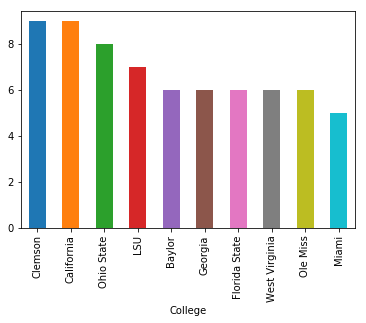

In [244]:
wrtop10['Unnamed: 0'].plot.bar()

In [246]:
wrmeans = np.mean(wr[['Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']])

In [247]:
print(wrmeans, wrmeans - cbmeans)

Wt            201.711628
Vertical       35.255263
Bench          14.181818
Broad Jump    121.612903
3Cone          89.583010
Shuttle         4.207000
40yd            4.495333
dtype: float64 3Cone         82.654056
40yd          -0.010123
Bench         -0.558038
Broad Jump    -0.703958
Shuttle        0.027378
Vertical      -0.415469
Wt             5.257388
dtype: float64


In [248]:
wrcorr = wr[['Overall Rating','Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [250]:
wrcorr

,Overall Rating,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Overall Rating,1.000000,0.047923,0.038214,0.051951,0.012085,0.013846,-0.002859,-0.086817
Wt,0.047923,1.000000,0.047047,0.286740,0.057718,-0.017378,0.134591,0.223607
Vertical,0.038214,0.047047,1.000000,0.294683,0.612643,-0.043818,-0.207090,-0.303330
Bench,0.051951,0.286740,0.294683,1.000000,0.195799,-0.012066,-0.130048,-0.128825
Broad Jump,0.012085,0.057718,0.612643,0.195799,1.000000,-0.021543,-0.098563,-0.371211
3Cone,0.013846,-0.017378,-0.043818,-0.012066,-0.021543,1.000000,0.028512,-0.023492
Shuttle,-0.002859,0.134591,-0.207090,-0.130048,-0.098563,0.028512,1.000000,0.178807
40yd,-0.086817,0.223607,-0.303330,-0.128825,-0.371211,-0.023492,0.178807,1.000000


In [ ]:
#Tight End

In [251]:
te = mcfd[mcfd['Position'] == 'TE']

In [252]:
tecount = te.groupby('College').count()

In [254]:
tesort = tecount.sort_values('Unnamed: 0', ascending= False)

In [255]:
tetop10 = tesort.head(10)

In [256]:
print(tetop10['Unnamed: 0'])

College
Miami         6
Notre Dame    6
Tennessee     6
Iowa          4
Arkansas      4
Louisville    4
UCLA          4
Oklahoma      4
Stanford      4
Penn State    4
Name: Unnamed: 0, dtype: int64


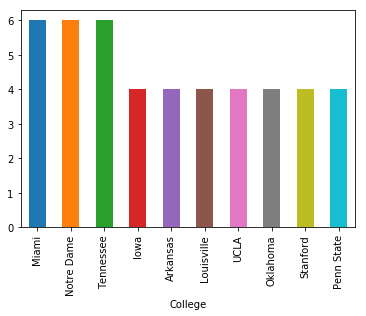

In [257]:
tetop10['Unnamed: 0'].plot.bar()

In [258]:
temeans = np.mean(te[['Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']])

In [259]:
print(temeans, temeans - wrmeans)

Wt            251.784946
Vertical       33.242857
Bench          20.189189
Broad Jump    117.941176
3Cone          95.390473
Shuttle         4.377119
40yd            4.741034
dtype: float64 Wt            50.073318
Vertical      -2.012406
Bench          6.007371
Broad Jump    -3.671727
3Cone          5.807462
Shuttle        0.170119
40yd           0.245701
dtype: float64


In [262]:
tecorr = te[['Overall Rating' , 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [263]:
tecorr

,Overall Rating,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Overall Rating,1.000000,0.046918,0.058868,0.030217,0.040349,-0.142260,-0.011252,-0.136916
Wt,0.046918,1.000000,-0.194969,0.265839,-0.244835,-0.018823,0.254545,0.439213
Vertical,0.058868,-0.194969,1.000000,-0.080847,0.678557,0.028172,-0.041715,-0.504103
Bench,0.030217,0.265839,-0.080847,1.000000,-0.057964,-0.048647,0.143032,0.024201
Broad Jump,0.040349,-0.244835,0.678557,-0.057964,1.000000,0.148783,-0.192051,-0.610745
3Cone,-0.142260,-0.018823,0.028172,-0.048647,0.148783,1.000000,-0.018349,0.010316
Shuttle,-0.011252,0.254545,-0.041715,0.143032,-0.192051,-0.018349,1.000000,0.382996
40yd,-0.136916,0.439213,-0.504103,0.024201,-0.610745,0.010316,0.382996,1.000000


In [328]:
#HB 

In [264]:
hb = mcfd[mcfd['Position'] == 'HB']

In [265]:
hbcount = hb.groupby('College').count()

In [266]:
hbsort = hbcount.sort_values('Unnamed: 0', ascending= False)

In [267]:
hbtop10 = hbsort.head(10)

In [268]:
print(hbtop10['Unnamed: 0'])

College
LSU               7
Alabama           6
Oklahoma          5
California        5
Oregon            4
Florida           4
Arkansas          4
Texas             4
North Carolina    4
Utah              3
Name: Unnamed: 0, dtype: int64


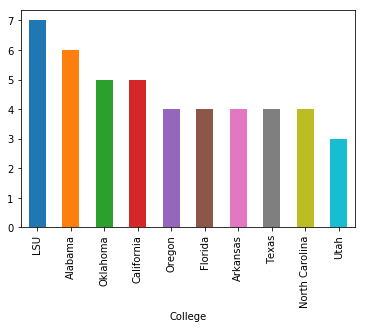

In [269]:
hbtop10['Unnamed: 0'].plot.bar()

In [270]:
hcorr = hb[['Overall Rating', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [271]:
hcorr

,Overall Rating,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Overall Rating,1.000000,0.171398,0.061010,0.092856,0.105594,0.000773,-0.064054,-0.032850
Wt,0.171398,1.000000,-0.110503,0.237253,-0.117880,0.013832,0.261675,0.451714
Vertical,0.061010,-0.110503,1.000000,0.125879,0.715376,-0.123865,-0.367873,-0.202269
Bench,0.092856,0.237253,0.125879,1.000000,0.065428,-0.071914,-0.101793,-0.063814
Broad Jump,0.105594,-0.117880,0.715376,0.065428,1.000000,-0.050224,-0.354821,-0.317262
3Cone,0.000773,0.013832,-0.123865,-0.071914,-0.050224,1.000000,0.027840,-0.014143
Shuttle,-0.064054,0.261675,-0.367873,-0.101793,-0.354821,0.027840,1.000000,0.261742
40yd,-0.032850,0.451714,-0.202269,-0.063814,-0.317262,-0.014143,0.261742,1.000000


In [272]:
fb = mcfd[mcfd['Position'] == 'FB']

In [273]:
fbcount = fb.groupby('College').count()

In [274]:
fbsort = fbcount.sort_values('Unnamed: 0', ascending= False)
fbtop10 = fbsort.head(10)
print(fbtop10['Unnamed: 0'])

College
UCLA             2
Alabama          1
Oklahoma         1
West Georgia     1
Washington       1
Wake Forest      1
Virginia Tech    1
Villanova        1
USC              1
Tennessee        1
Name: Unnamed: 0, dtype: int64


In [345]:
##Defense

In [346]:
#Defensive Tackle

In [276]:
dt = mcfd[mcfd['Position'] == 'DT']

In [277]:
dtcount = dt.groupby('College').count()

In [278]:
dtsort = dtcount.sort_values('Unnamed: 0', ascending = False)

In [279]:
dttop10 = dtsort.head(10)

In [280]:
print(dttop10['Unnamed: 0'])

College
Alabama            7
Auburn             5
LSU                5
Clemson            5
Tennessee          4
Mississippi St.    4
Ohio State         3
Iowa               3
Florida            3
Notre Dame         3
Name: Unnamed: 0, dtype: int64


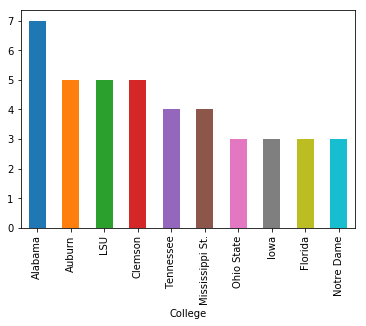

In [282]:
dttop10['Unnamed: 0'].plot.bar()

In [283]:
dtmeans = dt[['Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].mean()

In [284]:
print(dtmeans, dtmeans - lgmeans, dtmeans - cmean)

Wt            309.380435
Vertical       28.651316
Bench          27.472222
Broad Jump    104.905405
3Cone           7.679855
Shuttle         4.660714
40yd            4.888978
dtype: float64 Wt           -3.055929
Vertical      0.949188
Bench         0.764905
Broad Jump    1.759572
3Cone        -0.112971
Shuttle      -0.049498
40yd         -0.336113
dtype: float64 3Cone            -0.058933
40yd             -0.344852
Bench             1.115079
Broad Jump        2.505405
Overall Rating         NaN
Shuttle           0.012185
Vertical          1.304094
Wt                2.005435
dtype: float64


In [285]:
dtcorr = dt[['Overall Rating', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [286]:
dtcorr

,Overall Rating,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Overall Rating,1.000000,0.019548,0.052936,0.104453,0.042765,-0.157080,-0.109525,-0.095315
Wt,0.019548,1.000000,-0.432618,0.262344,-0.542910,0.551615,0.418875,0.332774
Vertical,0.052936,-0.432618,1.000000,0.128570,0.579819,-0.347134,-0.440322,-0.260466
Bench,0.104453,0.262344,0.128570,1.000000,-0.018996,-0.009965,-0.001561,0.012260
Broad Jump,0.042765,-0.542910,0.579819,-0.018996,1.000000,-0.545643,-0.447753,-0.355737
3Cone,-0.157080,0.551615,-0.347134,-0.009965,-0.545643,1.000000,0.651701,0.295697
Shuttle,-0.109525,0.418875,-0.440322,-0.001561,-0.447753,0.651701,1.000000,0.277994
40yd,-0.095315,0.332774,-0.260466,0.012260,-0.355737,0.295697,0.277994,1.000000


In [ ]:
##Defensive Ends

In [287]:
re = mcfd[mcfd['Position'] == 'RE']

In [288]:
le = mcfd[mcfd['Position'] == 'LE']
lecount = le.groupby('College').count()
letop10 = lecount.head(10)
print(letop10['Unnamed: 0'])

College
Alabama           2
Alabama AM        1
Appalach. St.     1
Arizona           2
Arizona St.       1
Arkansas          2
Auburn            1
Bloomsburg        1
Boise State       3
Boston College    1
Name: Unnamed: 0, dtype: int64


In [289]:
recount = re.groupby('College').count()

In [290]:
resort = recount.sort_values('Unnamed: 0', ascending=False)

In [291]:
retop10 = resort.head(10)
print(retop10['Unnamed: 0'])

College
Miami              4
Mississippi St.    4
Penn State         4
USC                4
Texas AM           3
South Carolina     3
Iowa               3
Georgia Tech       3
Florida            3
Carson-Newman      3
Name: Unnamed: 0, dtype: int64


In [293]:
de = pd.concat([re, le], axis = 0)

In [294]:
decount = de.groupby('College').count()

In [295]:
desort = decount.sort_values('Unnamed: 0', ascending=False)

In [296]:
detop10 = desort.head(10)

In [297]:
print(detop10['Unnamed: 0'])

College
Florida            7
Mississippi St.    7
Penn State         6
LSU                6
UCLA               5
USC                5
Michigan           5
Georgia            5
Virginia           4
Ole Miss           4
Name: Unnamed: 0, dtype: int64


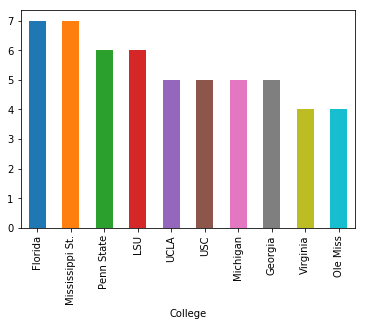

In [298]:
detop10['Unnamed: 0'].plot.bar()

In [300]:
demean = de[['Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].mean()

In [301]:
print(demean - means)

3Cone        -25.062413
40yd           0.115067
Bench          4.035039
Broad Jump    -0.939084
Shuttle        0.081611
Vertical      -0.583632
Wt            32.038940
dtype: float64


In [302]:
decorr = de[['Overall Rating', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [303]:
decorr

,Overall Rating,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Overall Rating,1.000000,-0.036935,0.054510,0.091916,0.023024,-0.172538,-0.124194,-0.081734
Wt,-0.036935,1.000000,-0.409310,0.448773,-0.533544,0.481980,0.410051,0.676403
Vertical,0.054510,-0.409310,1.000000,0.090936,0.693197,-0.319900,-0.405754,-0.508018
Bench,0.091916,0.448773,0.090936,1.000000,-0.064865,0.123983,0.066615,0.120454
Broad Jump,0.023024,-0.533544,0.693197,-0.064865,1.000000,-0.428956,-0.401824,-0.577201
3Cone,-0.172538,0.481980,-0.319900,0.123983,-0.428956,1.000000,0.635676,0.459008
Shuttle,-0.124194,0.410051,-0.405754,0.066615,-0.401824,0.635676,1.000000,0.430428
40yd,-0.081734,0.676403,-0.508018,0.120454,-0.577201,0.459008,0.430428,1.000000


In [359]:
#Right Outside Linebacker

In [305]:
rlb = mcfd[mcfd['Position'] == 'ROLB']

In [306]:
rlbcount = rlb.groupby('College').count()

In [307]:
rlbsort = rlbcount.sort_values('Unnamed: 0', ascending=False)

In [308]:
rlbtop10 = rlbsort.head(10)

In [309]:
print(rlbtop10['Unnamed: 0'])

College
Texas              4
Missouri           4
Wisconsin          3
California         3
Rutgers            3
Arizona St.        3
Mississippi St.    3
LSU                3
Georgia            3
Alabama            2
Name: Unnamed: 0, dtype: int64


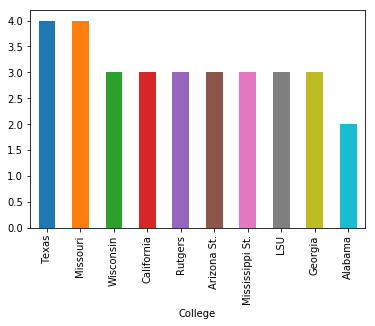

In [310]:
rlbtop10['Unnamed: 0'].plot.bar()

In [311]:
rlbmeans = rlb[['Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].mean()

In [312]:
print(rlbmeans, rlbmeans - mlbmeans)

Wt            248.426471
Vertical       33.589286
Bench          22.647059
Broad Jump    117.910714
3Cone           7.083902
Shuttle         4.325581
40yd            4.736615
dtype: float64 3Cone            -0.021934
40yd              0.031011
Bench             0.714128
Broad Jump       -0.452319
Overall Rating         NaN
Shuttle           0.037195
Vertical         -0.300151
Wt                9.304123
Wt                9.304123
dtype: float64


In [313]:
rlbcorr = rlb[['Overall Rating', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [314]:
rlbcorr

,Overall Rating,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Overall Rating,1.000000,0.013611,0.119447,0.045095,0.154546,-0.025863,-0.069503,-0.125196
Wt,0.013611,1.000000,-0.097010,0.254790,-0.129612,0.199982,0.339540,0.536233
Vertical,0.119447,-0.097010,1.000000,0.268501,0.692533,-0.046082,-0.171422,-0.360366
Bench,0.045095,0.254790,0.268501,1.000000,0.223570,0.032065,0.103938,-0.023691
Broad Jump,0.154546,-0.129612,0.692533,0.223570,1.000000,-0.121140,-0.141559,-0.493507
3Cone,-0.025863,0.199982,-0.046082,0.032065,-0.121140,1.000000,0.626233,0.077561
Shuttle,-0.069503,0.339540,-0.171422,0.103938,-0.141559,0.626233,1.000000,0.215510
40yd,-0.125196,0.536233,-0.360366,-0.023691,-0.493507,0.077561,0.215510,1.000000


In [374]:
#Left Outside Linebacker

In [315]:
llb = mcfd[mcfd['Position'] == 'LOLB']

In [316]:
llbcount = llb.groupby('College').count()

In [317]:
llbsort = llbcount.sort_values('Unnamed: 0', ascending=False)

In [318]:
llbtop10 = llbsort.head(10)

In [319]:
print(llbtop10['Unnamed: 0'])

College
UCLA                4
Florida State       3
Auburn              3
Georgia             3
USC                 3
Utah                3
North Dakota St.    2
Missouri            2
Minnesota           2
Miami               2
Name: Unnamed: 0, dtype: int64


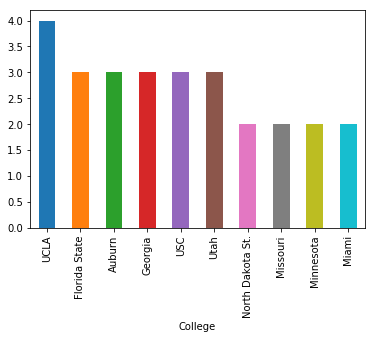

In [320]:
llbtop10['Unnamed: 0'].plot.bar()

In [321]:
fs = mcfd[mcfd['Position'] == 'FS']

In [323]:
fscount = fs.groupby('College').count()

In [324]:
fssort = fscount.sort_values('Unnamed: 0', ascending=False)

In [325]:
fstop10 = fssort.head(10)

In [326]:
print(fstop10['Unnamed: 0'])

College
Ohio State        5
Connecticut       4
San Jose St.      4
Auburn            3
Virginia Tech     3
Boston College    3
Texas AM          3
Stanford          3
Alabama           2
LSU               2
Name: Unnamed: 0, dtype: int64


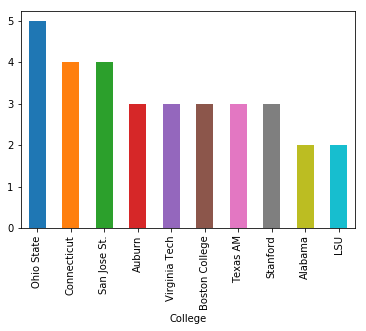

In [327]:
fstop10['Unnamed: 0'].plot.bar()

In [328]:
fsmeans = fs[['Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].mean()

In [329]:
print(fsmeans, fsmeans - cbmeans)

Wt            204.178266
Vertical       35.844910
Bench          16.470751
Broad Jump    122.461317
3Cone           6.945178
Shuttle         4.176151
40yd            4.567601
dtype: float64 3Cone         0.016223
40yd          0.062144
Bench         1.730894
Broad Jump    0.144456
Shuttle      -0.003472
Vertical      0.174178
Wt            7.724026
dtype: float64


In [330]:
fscorr = fs[['Overall Rating', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [331]:
fscorr

,Overall Rating,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Overall Rating,1.000000,-0.021303,0.008562,-0.090370,0.016259,-0.076044,-0.011435,-0.113448
Wt,-0.021303,1.000000,0.006734,0.402940,0.246555,0.002307,0.039899,0.103492
Vertical,0.008562,0.006734,1.000000,0.136825,0.770151,-0.222962,-0.406878,-0.411479
Bench,-0.090370,0.402940,0.136825,1.000000,0.144150,-0.112034,0.027308,-0.119007
Broad Jump,0.016259,0.246555,0.770151,0.144150,1.000000,-0.232883,-0.399162,-0.384034
3Cone,-0.076044,0.002307,-0.222962,-0.112034,-0.232883,1.000000,0.489954,0.164926
Shuttle,-0.011435,0.039899,-0.406878,0.027308,-0.399162,0.489954,1.000000,0.268892
40yd,-0.113448,0.103492,-0.411479,-0.119007,-0.384034,0.164926,0.268892,1.000000


In [332]:
ss = mcfd[mcfd['Position'] == 'SS']

In [333]:
sscount= ss.groupby('College').count()

In [334]:
sssort= sscount.sort_values('Unnamed: 0', ascending= False)

In [335]:
sstop10 = sssort.head(10)
print(sstop10['Unnamed: 0'])

College
Florida          4
Oregon           3
Georgia          3
West Virginia    3
USC              3
Ohio State       2
Notre Dame       2
N.C. State       2
Michigan         2
Miami            2
Name: Unnamed: 0, dtype: int64


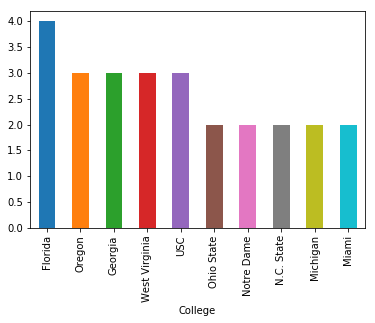

In [336]:
sstop10['Unnamed: 0'].plot.bar()

In [337]:
ssmeans = ss[['Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].mean()

In [338]:
print(ssmeans, ssmeans - fsmeans, ssmeans - cbmeans)

Wt            210.048387
Vertical       34.413462
Bench          16.375000
Broad Jump    120.169811
3Cone           7.005952
Shuttle         4.221026
40yd            4.579828
dtype: float64 Wt            5.870121
Vertical     -1.431449
Bench        -0.095751
Broad Jump   -2.291506
3Cone         0.060774
Shuttle       0.044875
40yd          0.012227
dtype: float64 3Cone          0.076998
40yd           0.074371
Bench          1.635144
Broad Jump    -2.147050
Shuttle        0.041403
Vertical      -1.257270
Wt            13.594147
dtype: float64


In [339]:
sscorr = ss[['Overall Rating', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [340]:
sscorr

,Overall Rating,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Overall Rating,1.000000,0.200842,0.137311,0.155467,0.068074,0.099014,0.077150,0.085863
Wt,0.200842,1.000000,-0.208965,0.231553,-0.341579,0.574528,0.684780,0.645303
Vertical,0.137311,-0.208965,1.000000,0.275671,0.710859,-0.179215,-0.232421,-0.392194
Bench,0.155467,0.231553,0.275671,1.000000,0.201703,0.037236,0.068589,-0.124615
Broad Jump,0.068074,-0.341579,0.710859,0.201703,1.000000,-0.340464,-0.340147,-0.565196
3Cone,0.099014,0.574528,-0.179215,0.037236,-0.340464,1.000000,0.848522,0.385896
Shuttle,0.077150,0.684780,-0.232421,0.068589,-0.340147,0.848522,1.000000,0.463874
40yd,0.085863,0.645303,-0.392194,-0.124615,-0.565196,0.385896,0.463874,1.000000


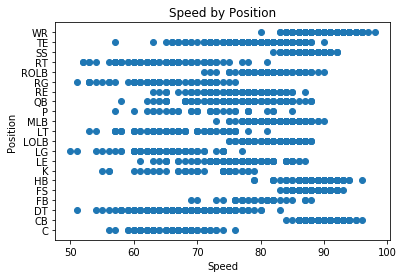

In [341]:
plt.scatter(m18['Speed'], m18['Position'])
plt.xlabel('Speed')
plt.ylabel('Position')
plt.title('Speed by Position')
plt.show()